# Playground for Distance Metrics

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, GMMA 869

In [4]:
import datetime
print(datetime.datetime.now())

2020-11-05 07:43:19.314683


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

# Distance Metrics for Simple Numeric Features

Let's make up some data and a nice plot for the slides

In [7]:
import scipy.spatial.distance as dist
import numpy as np
import itertools

# Prepare 3 vectors (data points) of 2 dimensions
points = pd.DataFrame(data={'id':['A', 'B', 'C'], 'dim1':[1, 2, 5], 'dim2':[1, 1, 5]})
display(points.head())

id  dim1  dim2
0  A     1     1
1  B     2     1
2  C     5     5

In [5]:
for combo in itertools.combinations(points['id'], 2):
    v1 = points[points['id'] == combo[0]][['dim1', 'dim2']]
    v2 = points[points['id'] == combo[1]][['dim1', 'dim2']]
    
    print('\nPoints {} and {}:'.format(combo[0], combo[1]))
    print('Euclidean distance: {:.2f}'.format(dist.euclidean(v1, v2)))
    print('Manhattan distance: {:.2f}'.format(dist.cityblock(v1, v2)))
    print('Chebyshev distance: {:.2f}'.format(dist.chebyshev(v1, v2)))
    print('Canberra distance: {:.2f}'.format(dist.canberra(v1, v2)))
    print('Cosine distance: {:.2f}'.format(dist.cosine(v1, v2)))
    


Points A and B:
Euclidean distance: 1.00
Manhattan distance: 1.00
Chebyshev distance: 1.00
Canberra distance: 0.33
Cosine distance: 0.05

Points A and C:
Euclidean distance: 5.66
Manhattan distance: 8.00
Chebyshev distance: 4.00
Canberra distance: 1.33
Cosine distance: 0.00

Points B and C:
Euclidean distance: 5.00
Manhattan distance: 7.00
Chebyshev distance: 4.00
Canberra distance: 1.10
Cosine distance: 0.05


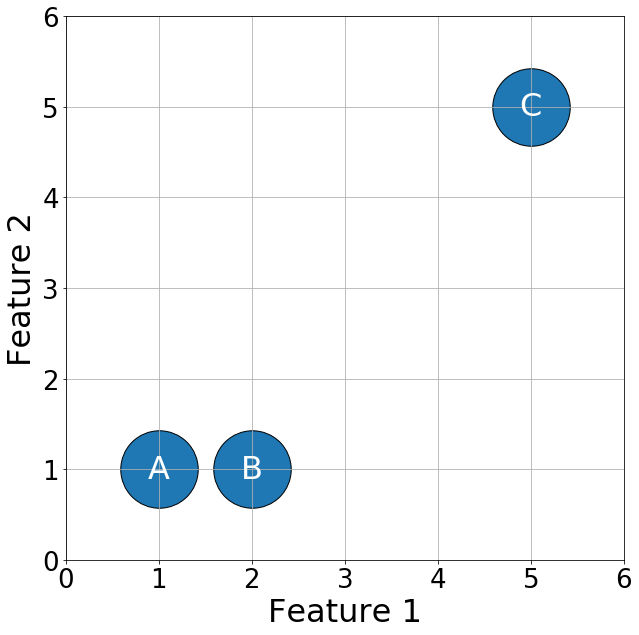

In [6]:
plt.figure(figsize=(10, 10));
plt.grid(True);

plt.scatter(points['dim1'], points['dim2'], s=6000, marker='o', edgecolors='black');
#plt.title("Distances", fontsize=20);
plt.xlabel('Feature 1', fontsize=32);
plt.ylabel('Feature 2', fontsize=32);
plt.xticks(fontsize=26);
plt.yticks(fontsize=26);
plt.xlim(left=0, right=6);
plt.ylim(bottom=0, top=6);

for i, txt in enumerate(points['id']):
    plt.text(x=points['dim1'].iloc[i], y=points['dim2'].iloc[i], s=txt, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='white');
    
plt.show();

# What Happens if we scale?

In [17]:
from sklearn.preprocessing import StandardScaler

X = points[['dim1', 'dim2']].to_numpy()
X

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[1, 1],
       [2, 1],
       [5, 5]], dtype=int64)

array([[-0.98058068, -0.70710678],
       [-0.39223227, -0.70710678],
       [ 1.37281295,  1.41421356]])

In [23]:

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

metrics = ["euclidean", "cosine", "chebyshev", "cityblock", "canberra"]
for metric in metrics:
    d1 = dist.pdist(X, metric=metric)
    d2 = dist.pdist(X_scaled, metric=metric)
    print("\nMetric: {}".format(metric))
    print("  Raw:    {}".format(d1))
    print("  Scaled: {}".format(d2))
    print("  Raw Norm:    {}".format(d1/d1.sum()))
    print("  Scaled Norm: {}".format(d2/d2.sum()))


Metric: euclidean
  Raw:    [1.    5.657 5.   ]
  Scaled: [0.588 3.168 2.76 ]
  Raw Norm:    [0.086 0.485 0.429]
  Scaled Norm: [0.09  0.486 0.423]

Metric: cosine
  Raw:    [0.051 0.    0.051]
  Scaled: [0.095 1.985 1.965]
  Raw Norm:    [0.5 0.  0.5]
  Scaled Norm: [0.024 0.491 0.486]

Metric: chebyshev
  Raw:    [1. 4. 4.]
  Scaled: [0.588 2.353 2.121]
  Raw Norm:    [0.111 0.444 0.444]
  Scaled Norm: [0.116 0.465 0.419]

Metric: cityblock
  Raw:    [1. 8. 7.]
  Scaled: [0.588 4.475 3.886]
  Raw Norm:    [0.062 0.5   0.438]
  Scaled Norm: [0.066 0.5   0.434]

Metric: canberra
  Raw:    [0.333 1.333 1.095]
  Scaled: [0.429 2.    2.   ]
  Raw Norm:    [0.121 0.483 0.397]
  Scaled Norm: [0.097 0.452 0.452]


In [9]:
a = np.array([1.6, -0.4, -0.1, -0.1, -0.5, -0.4, 0.3])
b = np.array([1.3, -0.2, -0.1, -0.1, -2.1, -0.9, 1.3])
dist.euclidean(a, b)

1.9849433241279208

In [10]:
(0.29*7 + 1.98*6) / 13 

1.0699999999999998